# Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vars

In [2]:
MARCH_REG = "../data/march_reg.csv"
MARCH_FTD = "../data/march_ftd.csv"

FEB_REG = "../data/feb_reg.csv"
FEB_FTD = "../data/feb_ftd.csv"

In [3]:
march_reg, march_ftd, feb_reg, feb_ftd = tuple(map(
    
    lambda x: pd.read_csv(x, parse_dates=["Event_Time"]), (
        
        MARCH_REG, MARCH_FTD, 
        FEB_REG, FEB_FTD
    )))

# Funcs & Classes

In [4]:
def clean_duplicates(df, subset: list):
    df = df.drop_duplicates(subset=subset, keep="last")
    return df

In [5]:
def dist_plot(data: pd.Series, title: str, xlabel:str):
    
    data = data.value_counts()
    data = data.sort_index()
    data.plot(kind="bar", title=title, figsize=(14,6))
    
    plt.xlabel(xlabel)
    plt.ylabel("ftd count")
    plt.grid()

In [6]:
class PrepDF:
    
    def __init__(self, df):
        self.df = df.copy()
        self.result = df
        
    def add_features(self, inplase=True):
        df = self.df
        df = df.rename(columns={"Event_Time_x": "Time_reg", "Event_Time_y": "Time_ftd"})

        df["days_diff"] = df["Time_ftd"] - df["Time_reg"]
        df["days_diff"] = df["days_diff"].dt.days
        
        if inplase:
            self.result = df
        return df
    
    def reduce_days(self, delay=3, inplase=True):
        df = self.result
        df = df[(df["days_diff"] >= 0) & (df["days_diff"] <= delay)]
        
        if inplase:
            self.result = df
        return df
    
    def sample_days(self, first=1, last=13, inplase=True):
        df = self.result
        df = df[(df["Time_reg"].dt.day >= first) & (df["Time_reg"].dt.day <= last)]
        
        if inplase:
            self.result = df
        return df

# EDA

## March tfd

In [7]:
march_ftd.head()

,ClientID,Platform,Event_Time,Partner,Appsflyer_ID,Media_Source
0,9840780,ios,2022-03-15 17:07:20,azurmarketing,1647287844462-7019988,kvidu_int
1,9840780,ios,2022-03-15 17:05:14,azurmarketing,1647287844462-7019988,kvidu_int
2,9612499,ios,2022-03-15 10:33:02,Wakeapp,1645012243809-7640417,mozhe_int
3,9826854,ios,2022-03-15 22:35:36,reliz,1643044132200-5207319,reliz_int
4,5625207,ios,2022-03-15 17:03:13,reliz,1646085590238-3158552,reliz_int


In [8]:
march_ftd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientID      2143 non-null   int64         
 1   Platform      2143 non-null   object        
 2   Event_Time    2143 non-null   datetime64[ns]
 3   Partner       1982 non-null   object        
 4   Appsflyer_ID  2143 non-null   object        
 5   Media_Source  2074 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 100.6+ KB


## March reg

In [9]:
march_reg.head()

,ClientNumber,Event_Time,Appsflyer_ID
0,71470098,2022-03-15 06:09:42,1647257957970-5457722
1,63584647,2022-03-15 17:25:07,1647354175228-7297811
2,89632803,2022-03-15 19:38:04,1647361580691-0542415
3,19718611,2022-03-15 20:20:03,1647364583089-7988693
4,48374403,2022-03-15 21:32:28,1643045596034-0599708


In [10]:
march_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7435 entries, 0 to 7434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  7435 non-null   int64         
 1   Event_Time    7435 non-null   datetime64[ns]
 2   Appsflyer_ID  7435 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 174.4+ KB


## Feb tfd

In [11]:
feb_ftd.head()

,ClientID,Platform,Event_Time,Partner,Appsflyer_ID,Media_Source
0,9690338,ios,2022-02-28 18:35:07,NaN,1645800879577-1978019,NaN
1,9678875,ios,2022-02-28 01:05:11,reliz,1645534688375-4206247,reliz_int
2,9690548,ios,2022-02-28 13:39:22,reliz,1645809859278-4968647,reliz_int
3,9690548,ios,2022-02-28 13:37:07,reliz,1645809859278-4968647,reliz_int
4,9153634,ios,2022-02-28 17:35:02,reliz,1638981544066-6658875,olimob_int


In [12]:
feb_ftd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18673 entries, 0 to 18672
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientID      18673 non-null  int64         
 1   Platform      18673 non-null  object        
 2   Event_Time    18673 non-null  datetime64[ns]
 3   Partner       14612 non-null  object        
 4   Appsflyer_ID  18673 non-null  object        
 5   Media_Source  14595 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 875.4+ KB


## Feb reg

In [13]:
feb_reg.head()

,ClientNumber,Event_Time,Appsflyer_ID
0,72650215,2022-02-28 04:07:42,1645451768790-7607549
1,70595979,2022-02-28 14:43:06,1646048494616-3077459
2,62257111,2022-02-28 17:22:20,1646057542051-4084476
3,82557527,2022-02-28 22:44:26,1646076786336-4080534
4,25007787,2022-02-28 22:29:59,1645967839264-6110775


In [14]:
feb_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23037 entries, 0 to 23036
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  23037 non-null  int64         
 1   Event_Time    23037 non-null  datetime64[ns]
 2   Appsflyer_ID  23037 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 540.1+ KB


# Task

Что с чем мы сравниваем:
1.  Конверсию в ftd в течение трёх дней после регистрации за период 6 - 18 марта
2.  Конверсию в ftd в течение трёх дней после регистрации за период 1 - 28 февраля
3. Посчитать сколько ftd мы отправим если изменим правило в dwh

# Process

In [15]:
feb_ftd[feb_ftd["ClientID"] == 9482611].head()
# Много повторов, нужно чистить, будем считать, что последняя конвертация была успешной

,ClientID,Platform,Event_Time,Partner,Appsflyer_ID,Media_Source
7091,9482611,android,2022-02-05 19:45:26,toptraffic,1644072065418-8440638203130584532,mobyoung_int
7092,9482611,android,2022-02-05 19:44:55,toptraffic,1644072065418-8440638203130584532,mobyoung_int
7093,9482611,android,2022-02-05 19:44:15,toptraffic,1644072065418-8440638203130584532,mobyoung_int
7094,9482611,android,2022-02-05 19:44:45,toptraffic,1644072065418-8440638203130584532,mobyoung_int
7095,9482611,android,2022-02-05 19:43:55,toptraffic,1644072065418-8440638203130584532,mobyoung_int


In [16]:
feb_reg[feb_reg["ClientNumber"] == 66115439]
# Тут такая же история

,ClientNumber,Event_Time,Appsflyer_ID
20584,66115439,2022-02-01 03:11:18,1643674077697-9014271328796444961
20585,66115439,2022-02-01 03:12:00,1643674077697-9014271328796444961


In [17]:
feb_ftd = clean_duplicates(feb_ftd, subset=["ClientID"])
march_ftd = clean_duplicates(march_ftd, subset=["ClientID"])

feb_reg = clean_duplicates(feb_reg, subset=["ClientNumber"])
march_reg = clean_duplicates(march_reg, subset=["ClientNumber"])

## Merge

In [18]:
february = feb_reg.merge(feb_ftd, on="Appsflyer_ID", how="inner")
february.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5729 entries, 0 to 5728
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  5729 non-null   int64         
 1   Event_Time_x  5729 non-null   datetime64[ns]
 2   Appsflyer_ID  5729 non-null   object        
 3   ClientID      5729 non-null   int64         
 4   Platform      5729 non-null   object        
 5   Event_Time_y  5729 non-null   datetime64[ns]
 6   Partner       4764 non-null   object        
 7   Media_Source  4768 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 402.8+ KB


In [19]:
march = march_reg.merge(march_ftd, on="Appsflyer_ID", how="inner")
march.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  731 non-null    int64         
 1   Event_Time_x  731 non-null    datetime64[ns]
 2   Appsflyer_ID  731 non-null    object        
 3   ClientID      731 non-null    int64         
 4   Platform      731 non-null    object        
 5   Event_Time_y  731 non-null    datetime64[ns]
 6   Partner       684 non-null    object        
 7   Media_Source  707 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 51.4+ KB


## Selection

In [20]:
feb_prep = PrepDF(february)
feb_prep.add_features() # добавим фичей
feb_prep.reduce_days(3) # выберем ftd, которые бьли не дальше 3х дней со дня регистрации

feb_prep.result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 1 to 5728
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  4177 non-null   int64         
 1   Time_reg      4177 non-null   datetime64[ns]
 2   Appsflyer_ID  4177 non-null   object        
 3   ClientID      4177 non-null   int64         
 4   Platform      4177 non-null   object        
 5   Time_ftd      4177 non-null   datetime64[ns]
 6   Partner       3487 non-null   object        
 7   Media_Source  3480 non-null   object        
 8   days_diff     4177 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 326.3+ KB


In [21]:
march_prep = PrepDF(march)
march_prep.add_features()
march_prep.reduce_days()

march_prep.result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 730
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ClientNumber  587 non-null    int64         
 1   Time_reg      587 non-null    datetime64[ns]
 2   Appsflyer_ID  587 non-null    object        
 3   ClientID      587 non-null    int64         
 4   Platform      587 non-null    object        
 5   Time_ftd      587 non-null    datetime64[ns]
 6   Partner       548 non-null    object        
 7   Media_Source  564 non-null    object        
 8   days_diff     587 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 45.9+ KB


# Result

ftd в течение трёх дней после регистрации за период 1 - 13 февраля = 2192


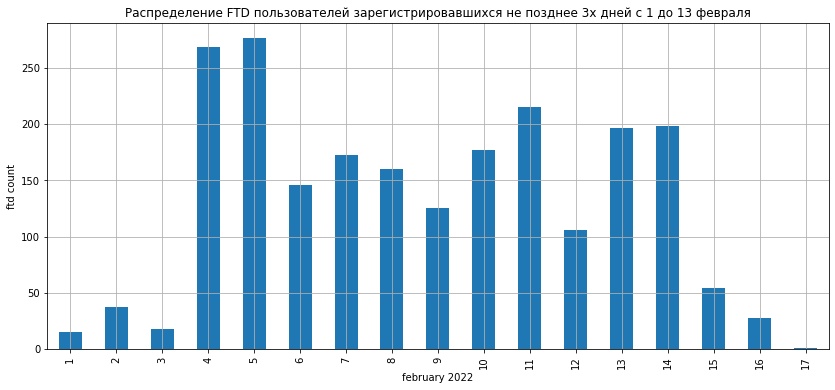

In [22]:
# уменьшим февральскую выборку по регистрации до 13 дней, что было как в марте

FIRST, LAST = 1, 13
feb_sample = feb_prep.sample_days(FIRST, LAST, inplase=False) 

dist_plot(
    data=feb_sample["Time_ftd"].dt.day,
    title=f"Распределение FTD пользователей зарегистрировавшихся не позднее 3х дней с {FIRST} до {LAST} февраля",
    xlabel="february 2022"
)

print(f"ftd в течение трёх дней после регистрации за период {FIRST} - {LAST} февраля = {feb_sample.shape[0]}")


ftd в течение трёх дней после регистрации за период 6 - 18 марта (всего 13 дней) = 587
Это на -1605 или 73.22% меньше чем в феврале



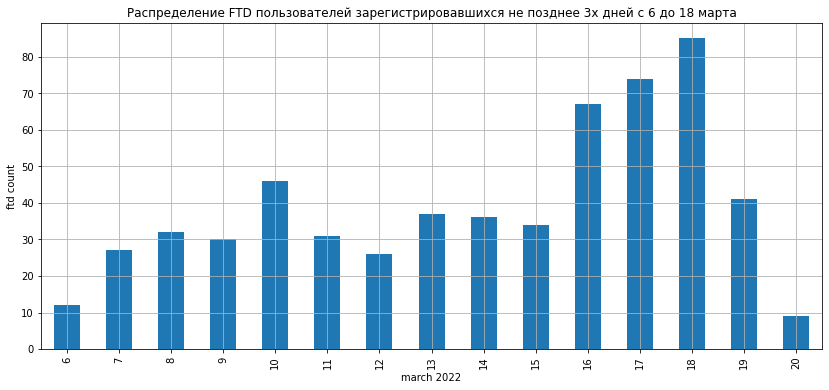

In [23]:
march_sample = march_prep.result

dist_plot(
    data=march_sample["Time_ftd"].dt.day,
    title="Распределение FTD пользователей зарегистрировавшихся не позднее 3х дней с 6 до 18 марта",
    xlabel="march 2022"
)

diff = march_sample.shape[0] - feb_sample.shape[0]
perc = round(1 - march_sample.shape[0] / feb_sample.shape[0] , 4) * 100

print(f"""
ftd в течение трёх дней после регистрации за период 6 - 18 марта (всего 13 дней) = {march_sample.shape[0]}
Это на {diff} или {perc}% меньше чем в феврале
""")

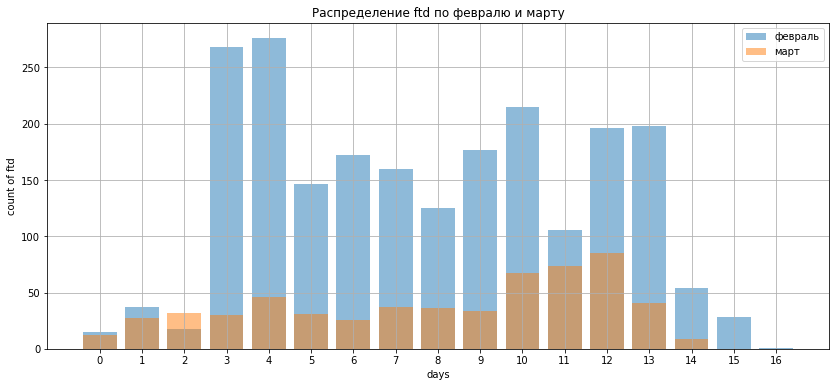

In [24]:
def prep_for_countplot(data):
    data = data["Time_ftd"].dt.day.value_counts()
    data = data.sort_index()
    data = data.reset_index(drop=True)
    return data

feb_countplot = prep_for_countplot(feb_sample)
march_countplot = prep_for_countplot(march_sample)

plt.figure(figsize=(14, 6))
plt.title("Распределение ftd по февралю и марту")

plt.bar(feb_countplot.index, feb_countplot.values, label="февраль", alpha=0.5)
plt.bar(march_countplot.index, march_countplot.values, label="март", alpha=0.5)

plt.legend()
plt.ylabel("count of ftd")
plt.xlabel("days")
plt.xticks(range(0,17))
plt.grid()
plt.show()

# addition

In [25]:
def addition(ftd, reg, title=""):
    prop = ftd.shape[0] / reg.shape[0]

    print(f"""
    {title} 
    Число регистаций = {reg.shape[0]} ({(1 - prop) * 100:.4}%); число ftd = {ftd.shape[0]} ({prop * 100:.4}%)
    Регистраций больше ftd на {reg.shape[0] - ftd.shape[0]}
    """)
    
    return prop

In [26]:
prop_feb = addition(feb_ftd, feb_reg, title="Февраль:")
prop_march = addition(march_ftd, march_reg, title="Март:")

print(f"В марте было на {(prop_feb - prop_march) * 100:.4}% меньше ftd")


    Февраль: 
    Число регистаций = 23030 (64.04%); число ftd = 8281 (35.96%)
    Регистраций больше ftd на 14749
    

    Март: 
    Число регистаций = 7433 (78.88%); число ftd = 1570 (21.12%)
    Регистраций больше ftd на 5863
    
В марте было на 14.84% меньше ftd


# Push on git

In [27]:
!git add ".\ftd reg - first 3 days.ipynb"
!git commit -m "add code"
!git push